In [ ]:
!pip install folium plotly seaborn

import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

df = pd.read_csv("startup_data.csv")

df.head()


,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


In [ ]:
cols_to_numeric = [
    "Funding Rounds",
    "Funding Amount (M USD)",
    "Valuation (M USD)",
    "Revenue (M USD)",
    "Employees",
    "Market Share (%)",
    "Profitable",
    "Year Founded"
]

for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=["Funding Amount (M USD)", "Valuation (M USD)"])


In [ ]:
df[["Funding Amount (M USD)", "Valuation (M USD)"]].corr()


,Funding Amount (M USD),Valuation (M USD)
Funding Amount (M USD),1.000000,0.795061
Valuation (M USD),0.795061,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[["Funding Amount (M USD)"]]
y = df["Valuation (M USD)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

y_pred = model_lin.predict(X_test)


In [ ]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("===== LINEAR REGRESSION RESULTS =====")
print(f"R² Score:              {r2:.4f}")
print(f"RMSE:                  {rmse:.2f}")
print(f"Coefficient (Slope):   {model_lin.coef_[0]:.4f}")
print(f"Intercept:             {model_lin.intercept_:.4f}")

print("\nRegression Equation:")
print(f"Valuation = {model_lin.intercept_:.4f} + {model_lin.coef_[0]:.4f} × Funding Amount")


===== LINEAR REGRESSION RESULTS =====
R² Score:              0.7039
RMSE:                  539.17
Coefficient (Slope):   8.8721
Intercept:             1.1328

Regression Equation:
Valuation = 1.1328 + 8.8721 × Funding Amount


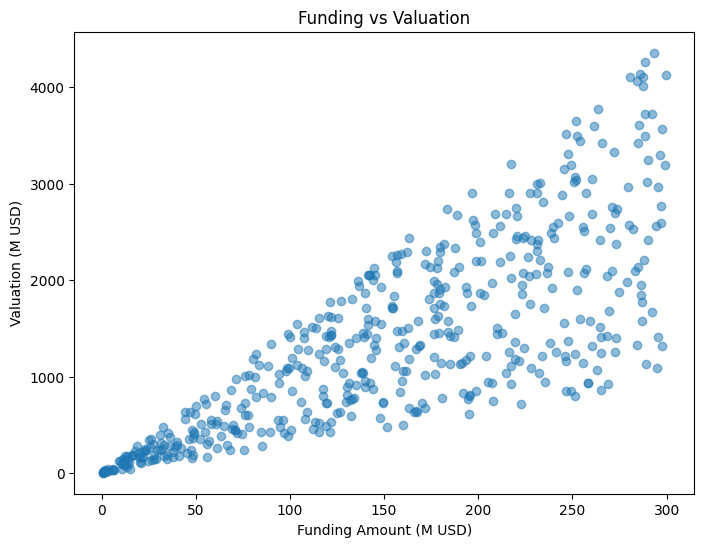

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["Funding Amount (M USD)"], df["Valuation (M USD)"], alpha=0.5)
plt.xlabel("Funding Amount (M USD)")
plt.ylabel("Valuation (M USD)")
plt.title("Funding vs Valuation")
plt.show()


In [ ]:
features = [
    "Funding Rounds",
    "Funding Amount (M USD)",
    "Revenue (M USD)",
    "Employees",
    "Market Share (%)",
    "Profitable",
    "Year Founded"
]

X = df[features]
y = df["Valuation (M USD)"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("===== RANDOM FOREST RESULTS =====")
print("R²:", r2_score(y_test, y_pred_rf))

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE:", rmse_rf)


===== RANDOM FOREST RESULTS =====
R²: 0.6386079726399089
RMSE: 595.6275301601049


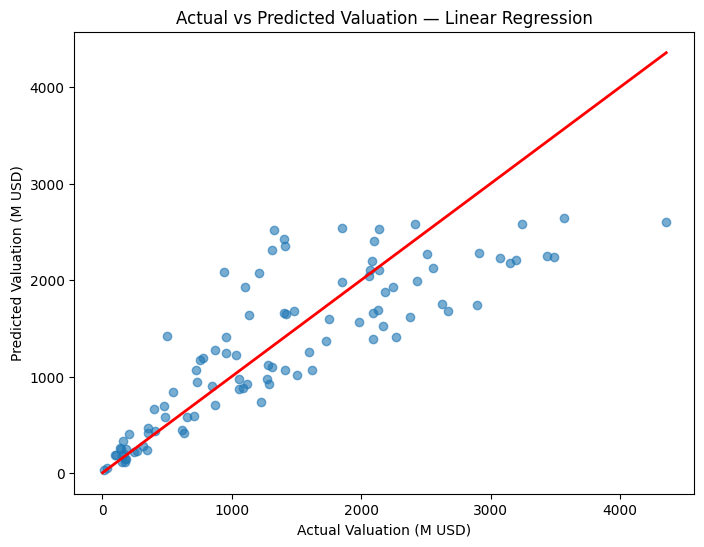

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Valuation (M USD)")
plt.ylabel("Predicted Valuation (M USD)")
plt.title("Actual vs Predicted Valuation — Linear Regression")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # perfect line
plt.show()


In [ ]:
import numpy as np

importance = pd.DataFrame({
    "Feature": features,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

importance


,Feature,Importance
1,Funding Amount (M USD),0.701830
3,Employees,0.073786
4,Market Share (%),0.071202
2,Revenue (M USD),0.063389
6,Year Founded,0.049863
0,Funding Rounds,0.020172
5,Profitable,0.019758


In [ ]:
df_region = df.groupby("Region")["Valuation (M USD)"].mean().reset_index()
df_region


,Region,Valuation (M USD)
0,Asia,1411.769515
1,Australia,1314.677963
2,Europe,1218.488824
3,North America,1492.329381
4,South America,1438.503333


In [ ]:
import numpy as np

region_to_countries = {
    "Europe": ["Germany", "United Kingdom", "France", "Netherlands", "Sweden"],
    "Asia": ["India", "China", "Singapore", "Japan", "South Korea"],
    "North America": ["United States", "Canada"],
    "South America": ["Brazil", "Argentina", "Chile"],
    "Australia": ["Australia"]
}

# Randomly assign a country within each region
def assign_country(region):
    return np.random.choice(region_to_countries.get(region, ["Unknown"]))

df["Country"] = df["Region"].apply(assign_country)
df.head()


,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status,Country
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private,Sweden
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private,Argentina
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private,Argentina
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private,Brazil
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired,France


In [ ]:
country_coords = {
    "United States": (37.0902, -95.7129),
    "Canada": (56.1304, -106.3468),
    "Brazil": (-14.2350, -51.9253),
    "Argentina": (-38.4161, -63.6167),
    "Chile": (-35.6751, -71.5430),

    "Germany": (51.1657, 10.4515),
    "United Kingdom": (55.3781, -3.4360),
    "France": (46.2276, 2.2137),
    "Netherlands": (52.1326, 5.2913),
    "Sweden": (60.1282, 18.6435),

    "India": (20.5937, 78.9629),
    "China": (35.8617, 104.1954),
    "Singapore": (1.3521, 103.8198),
    "Japan": (36.2048, 138.2529),
    "South Korea": (35.9078, 127.7669),

    "Australia": (-25.2744, 133.7751)
}


In [ ]:
def get_coords(country):
    return country_coords.get(country, (None, None))

df["lat"], df["lon"] = zip(*df["Country"].apply(get_coords))
df = df.dropna(subset=["lat", "lon"])


In [ ]:
import folium
from folium.plugins import MarkerCluster, HeatMap

m = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB positron")
cluster = MarkerCluster().add_to(m)

def color_for_industry(ind):
    colors = {
        "AI": "red",
        "FinTech": "blue",
        "HealthTech": "green",
        "EdTech": "purple",
        "Gaming": "orange",
        "IoT": "darkred",
        "Cybersecurity": "darkblue",
        "E-Commerce": "pink"
    }
    return colors.get(ind, "gray")

for _, row in df.iterrows():
    popup = f"""
    <b>{row['Startup Name']}</b><br>
    Industry: {row['Industry']}<br>
    Funding: {row['Funding Amount (M USD)']} M<br>
    Valuation: {row['Valuation (M USD)']} M<br>
    Country: {row['Country']}
    """

    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=max(3, row["Valuation (M USD)"] / 3000),
        color=color_for_industry(row["Industry"]),
        fill=True,
        fill_opacity=0.7,
        popup=popup
    ).add_to(cluster)

# Heatmap
HeatMap(df[["lat", "lon"]].values.tolist()).add_to(m)

m
